# SDG Data - Regional Data Factsheet 
## Sub-Saharan Africa
This workbook uses the custom-defined function to import and visualize the SDG data from the [UNSD global database](https://unstats.un.org/sdgs/dataportal). In principle, the workbook could churn out regional data fact sheet by defining the geoArea code. However, the SDG series used in this workbook does not alwayshave data for every region. Moreoever, the current workbook requires insepction on the axis limit and the manipulation of data story to fit into the graph.

In [1]:
# import packages for working directory
import os 
import pandas as pd 
import geopandas as gpd
import requests
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from int_func import return_datapoints, return_seriesCode, SDG_col

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
plt.rcParams['font.family'] = 'roboto'
plt.rcParams['figure.facecolor'] = '#FBFBFB'
plt.rcParams['font.size'] = '8'

plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['xtick.major.size'] = 0

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.rcParams['legend.framealpha'] = 0

### 1. Sub-Saharan Africa


In [4]:
geoAreaCode = '202' # sub-saharan africa # africa: '002'

# poverty data
G1_data  = return_datapoints(seriesCode = 'SI_POV_DAY1',geoAreaCode= geoAreaCode, plot = False)

# not sure about the hunger data
G2_data = return_datapoints(seriesCode = 'SH_STA_STNTN',geoAreaCode= geoAreaCode,plot = False)

# health: child mortality
G3_2_data= return_datapoints(seriesCode = 'SH_DYN_MORT',geoAreaCode= geoAreaCode,plot = False)

# health: skilled birth attendance (only 2004, 2011, 2021 datapoints)
G3_1_data = return_datapoints(seriesCode = 'SH_STA_BRTC',geoAreaCode= geoAreaCode,plot = False)

# health: new HIV incidence
G3_3_1_data  = return_datapoints(seriesCode = 'SH_HIV_INCD',geoAreaCode= geoAreaCode,plot = False)

# health: malaria (only indicator available on the api call, not consistent with the factsheet)
G3_3_3_data  = return_datapoints(seriesCode = 'SH_STA_MALR',geoAreaCode= geoAreaCode,plot = False)

# education: data points up to 2019 only, filter 'Sex' for 'BOTHSEX'
G4_c_1_data  = return_datapoints(seriesCode = 'SE_TRA_GRDL',geoAreaCode= geoAreaCode,plot = False)

# gender equality (only 1 data point)
G5_6_1_data  = return_datapoints(seriesCode = 'SH_FPL_INFM',geoAreaCode= geoAreaCode,plot = False)

# gender equality: early mariage (only every 5 years)
G5_3_1_data  = return_datapoints(seriesCode = 'SP_DYN_MRBF18',geoAreaCode= geoAreaCode,plot = False)

# energy: location filter on 'ALLAREA'
G7_1_1_data  = return_datapoints(seriesCode = 'EG_ACS_ELEC',geoAreaCode= geoAreaCode,plot = False)

# child labour (only 3 data points all in 2020, disaggregated by sex)
# secondary indicator 'SL_TLF_CHLDEA' yield no data point
G8_7_1_data = return_datapoints(seriesCode = 'SL_TLF_CHLDEC',geoAreaCode= geoAreaCode,plot = False)

# Manufacturing: data point up to 2019
G9_b_1_data  = return_datapoints(seriesCode = 'NV_IND_TECH',geoAreaCode= geoAreaCode,plot = False)

More than one disaggregative dimension available: ['Age' 'Location' 'Sex']
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
 There exists 10 data points for SI_POV_DAY1.
                 value     Age Location  Sex Reporting Type
timePeriodStart                                            
2010              43.0  ALLAGE  ALLAREA  All              G
2011              42.0  ALLAGE  ALLAREA  All              G
2012              41.0  ALLAGE  ALLAREA  All              G
2013              40.0  ALLAGE  ALLAREA  All              G
2014              39.0  ALLAGE  ALLAREA  All              G
The year available: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
 There exists 11 data points for SH_STA_STNTN.
Age                  <5Y
timePeriodStart         
2010             53806.2
2011             54137.3
2012             54341.8
2013             54467.1
2014             54576.2
More than one disaggregative dimension available: ['Age' 'Sex']
The year available: [201

### 2. Data Exploration

#### 2.1 Poverty Data
Proportion of population below international poverty line (%) [SI_POV_DAY1]

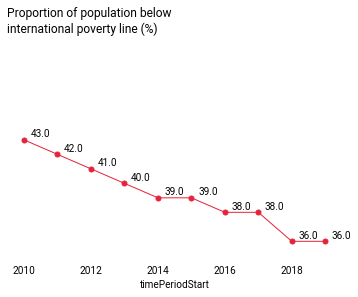

In [5]:
G1_plot = G1_data.plot.line(legend = False, 
                            marker = '.',markersize = 10, 
                            linewidth = 1, color = SDG_col[1])

# set title                        
G1_plot.set_title('Proportion of population below \ninternational poverty line (%)', loc='left')

# turning off spine.spines['right'].set_visible(False)
G1_plot.spines['top'].set_visible(False)
G1_plot.spines['right'].set_visible(False)
G1_plot.spines['bottom'].set_visible(False)
G1_plot.spines['left'].set_visible(False)
G1_plot.get_yaxis().set_visible(False)

# setting axis limit
G1_plot.set_ylim(35,50)
G1_plot.set_xlim(2009.5,2019.5)

#G1_plot.tick_params(axis='x', which='major', length=0, pad = 10)


for key, value in G1_data.iterrows():
    G1_plot.annotate(value['value'],(key+0.2,value['value']+0.2))



#### 2.2 Hunger Data

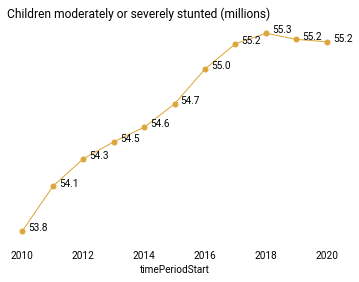

In [6]:
G2_plot = G2_data.plot.line(legend = False, 
                            marker = '.',markersize = 10, 
                            linewidth = 1, color = SDG_col[2])

# set title                        
G2_plot.set_title('Children moderately or severely stunted (millions)', loc='left')

# turning off spine.spines['right'].set_visible(False)
G2_plot.spines['top'].set_visible(False)
G2_plot.spines['right'].set_visible(False)
G2_plot.spines['bottom'].set_visible(False)
G2_plot.spines['left'].set_visible(False)
G2_plot.get_yaxis().set_visible(False)

# setting axis limit
#G2_plot.set_ylim(53000,56000)
G2_plot.set_xlim(2009.5,2020.5)

#G1_plot.tick_params(axis='x', which='major', length=0, pad = 10)


for key, value in G2_data.iterrows():
    G2_plot.annotate('{:.1f}'.format(value['<5Y']/1000),(key+0.2,value['<5Y']+0.2))

#### 2.3 Health data

##### 2.3.1 Skilled Birth Attendance

In [7]:
G3_1_data.head()


,value,Reporting Type
timePeriodStart,,
2011,51.87976,G
2021,64.33712,G


(-1.25, 1.25, -1.25, 1.25)

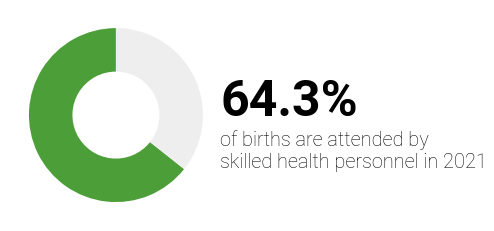

In [8]:
fig, ax = plt.subplots()
value = G3_1_data['value'][2021]
ax.pie( [value,(100 - value)],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[3],'#EEEEEE'])

ax.annotate('{:.1f}%'.format(value), (1.2,0), fontsize= 50,fontweight = 'bold')
ax.annotate('of births are attended by \nskilled health personnel in 2021', (1.2,-0.6), fontsize= 20,fontname = 'roboto',fontweight ='light')

ax.axis('on')

##### 2.3.2 Child mortality

In [9]:
G3_2_data_pivot = G3_2_data.pivot(index = None,columns = 'Sex', values= 'value')

Text(0.5, 1.0, 'Child Mortality')

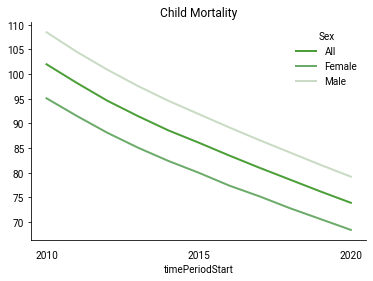

In [10]:
ax = G3_2_data_pivot.plot.line(linewidth = 2,color = [SDG_col[3],'#6dab6a','#c9dbc4'])

# turning off spine.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# xticks labels
ax.xaxis.set_ticks(np.arange(2010, 2021, 5))
ax.set_title('Child Mortality')

##### 2.3.3 Number of new HIV infections per 1,000 uninfected population, by sex and age (per 1,000 uninfected population)

In [11]:
G3_3_1_data_allage = G3_3_1_data[G3_3_1_data['Age']=='ALLAGE']
G3_3_1_data_allage = G3_3_1_data_allage.pivot(index = None,columns = 'Sex',values = 'value')

Text(0.5, 1.0, 'New HIV Incidence Rate')

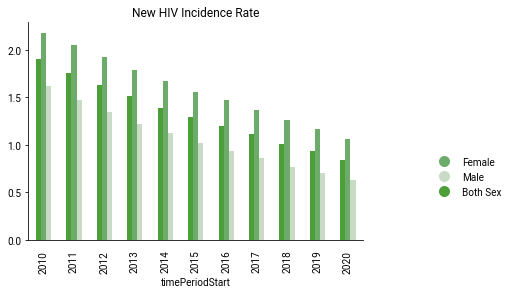

In [12]:
ax = G3_3_1_data_allage.plot.bar(linewidth = 2, color = [SDG_col[3],'#6dab6a','#c9dbc4']
                            )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#6dab6a', label='Female'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color='#c9dbc4', label='Male' ),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color=SDG_col[3], label='Both Sex')]

ax.legend(handles = legend_elements, bbox_to_anchor = (1.2,0.4), borderaxespad=0.)
ax.set_title('New HIV Incidence Rate')

Text(0.5, 1.0, 'New HIV Incidence Rate')

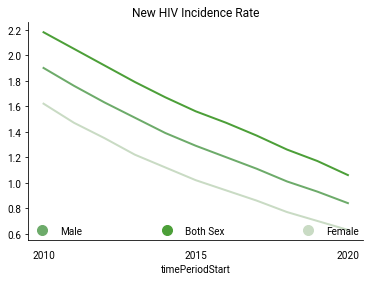

In [13]:
ax = G3_3_1_data_allage.plot.line(linewidth = 2, color = ['#6dab6a',SDG_col[3],'#c9dbc4']
                            )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2010, 2021, 5))


legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#6dab6a', label='Male'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color=SDG_col[3], label='Both Sex'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color='#c9dbc4', label='Female')]

ax.legend(handles = legend_elements, loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
ax.set_title('New HIV Incidence Rate')

##### 2.3.4 Malaria incidence per 1,000 population at risk (per 1,000 population) [SH_STA_MALR] 

Text(0.5, 1.0, 'New HIV Incidence Rate')

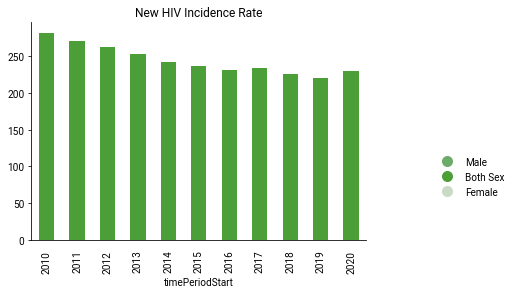

In [14]:
ax = G3_3_3_data.plot.bar(color = SDG_col[3])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.legend(handles = legend_elements, bbox_to_anchor = (1.2,0.4), borderaxespad=0.)
ax.set_title('New HIV Incidence Rate')

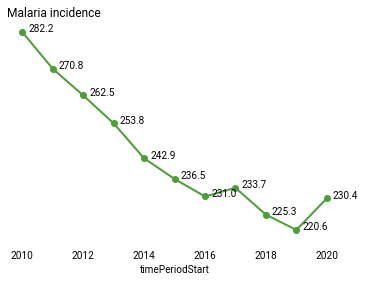

In [15]:
ax = G3_3_3_data.plot.line(linewidth = 2, color = [SDG_col[3]], marker = 'o'
                            )

ax.set_title('Malaria incidence', loc= 'left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', which='major', length=0, pad = 10)

ax.xaxis.set_ticks(np.arange(2010, 2021, 2))

ax.get_legend().remove()

for key, value in G3_3_3_data.iterrows():
    ax.annotate('{:.1f}'.format(value['value']),(key+0.2,value['value']+0.2))


2.4 Education
Proportion of teachers with the minimum required qualifications, by education level and sex (%) [SE_TRA_GRDL]

In [16]:
G4_c_1_data.head()

,value,Sex,Education level,Reporting Type
timePeriodStart,,,,
2010,44.58725,Male,PREPRI,G
2010,69.92087,All,PRIMAR,G
2010,52.01634,All,UPPSEC,G
2010,73.10912,Female,PRIMAR,G
2010,49.30994,All,PREPRI,G


In [17]:
G4_c_1_data_pop = G4_c_1_data[(G4_c_1_data['Education level'] != 'UPPSEC')&(G4_c_1_data['Education level'] != 'LOWSEC')]
G4_c_1_data_pop.head()

G4_c_1_data_all = G4_c_1_data_pop[G4_c_1_data_pop['Sex'] == 'All']
G4_c_1_data_all = G4_c_1_data_all.pivot(index = None,columns = 'Education level', values = 'value')

In [18]:
G4_c_1_data_all

Education level,PREPRI,PRIMAR,SECOND
timePeriodStart,,,
2010,49.30994,69.92087,59.98408
2011,45.73023,66.90280,53.20628
2012,42.37167,70.38081,59.11811
2013,40.46246,65.23207,54.93158
2014,51.97635,64.47091,56.22590
2015,53.44637,65.66009,56.95554
2016,54.19372,66.05912,61.29505
2017,56.36929,68.13600,61.98458
2018,56.03751,67.76939,62.60153


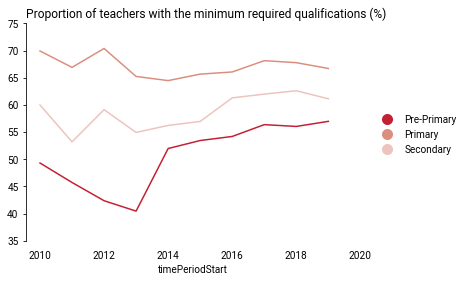

In [19]:
fig, ax = plt.subplots()

G4_c_1_data_all.plot.line(ax =ax, color = ['#c22033','#db8e7e','#ecc4bd'])

ax.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax.yaxis.set_ticks(np.arange(35, 76, 5))

ax.tick_params(axis='x', which='major', length=0, pad = 10)

legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color='#ecc4bd', label='Secondary')]

ax.legend(handles = legend_elements, bbox_to_anchor=[1.3, 0.6],
           ncol=1, borderaxespad=0.)

#### 2.5 Gender

##### 2.5.1 Proportion of women aged 20-24 years who were married or in a union before age 18 (%) [SP_DYN_MRBF18]

(-1.25, 1.25, -1.25, 1.25)

findfont: Font family ['roboto thick'] not found. Falling back to DejaVu Sans.
findfont: Font family ['roboto thick'] not found. Falling back to DejaVu Sans.


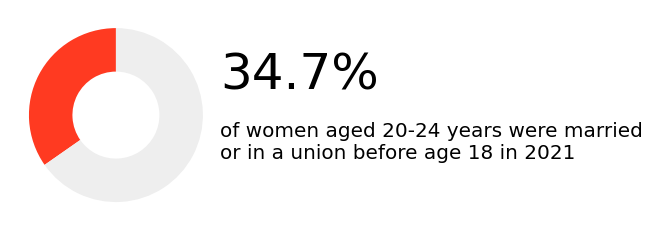

In [20]:
fig, ax = plt.subplots()

value = G5_3_1_data.loc[2021,'value'].item()
ax.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])

ax.annotate('{:n}%'.format(value), (1.2,0.3), fontsize= 50,fontname = 'roboto thick')
ax.annotate('of women aged 20-24 years were married \nor in a union before age 18 in 2021', (1.2,-0.5), fontsize= 20,fontname = 'roboto thick')

ax.axis('on')

##### 2.5.2 Proportion of women who make their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women aged 15-49 years) [SH_FPL_INFM]

In [21]:
G5_6_1_data.head()

,value,Age,Sex,Reporting Type
timePeriodStart,,,,
2022,47.3,15-49,Female,G


(-1.25, 1.25, -1.25, 1.25)

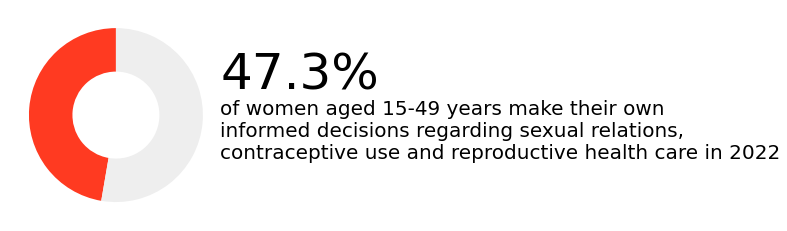

In [22]:
fig, ax = plt.subplots()

value = G5_6_1_data['value'].item()
ax.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])

ax.annotate('{:.1f}%'.format(value), (1.2,0.3), fontsize= 50,fontname = 'roboto thick')
ax.annotate('of women aged 15-49 years make their own \ninformed decisions regarding sexual relations, \ncontraceptive use and reproductive health care in 2022', (1.2,-0.5), fontsize= 20,fontname = 'roboto thick')

ax.axis('on')

#### 2.7 Energy

In [23]:
G7_1_1_data

Location,ALLAREA,RURAL,URBAN
timePeriodStart,,,
2010,33.12962,16.74940,68.21873
2011,35.73406,18.51714,72.27009
2012,36.63497,19.28876,72.33377
2013,37.74277,20.20840,72.47472
2014,38.03945,19.12878,72.33149
2015,38.77110,18.08098,72.12251
2016,43.55793,25.17801,74.82935
2017,43.46231,23.94885,76.26477
2018,46.13842,26.95989,75.62823


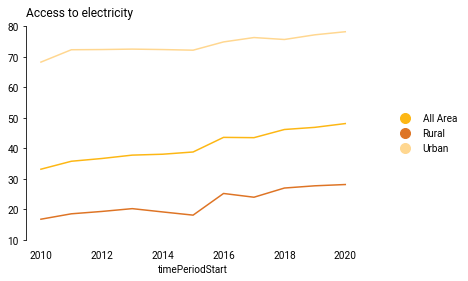

In [24]:
ax = G7_1_1_data.plot.line(color = ['#fdb714','#de7425','#ffd790'])
ax.xaxis.set_ticks(np.arange(2010, 2021, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines.left.set_bounds(10,80)

ax.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax.yaxis.set_ticks(np.arange(10, 81, 10))

ax.tick_params(axis='x', which='major', length=0, pad = 10)


ax.legend(bbox_to_anchor=(1.2,0.5))
ax.set_title('Access to electricity', loc = 'left')


legend_elements = [Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color= '#fdb714', label='All Area'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0,  color= '#de7425', label='Rural'),
                    Line2D([0], [0], marker='o', markersize = 10,linewidth=0, color= '#ffd790', label='Urban')]

ax.legend(handles = legend_elements, bbox_to_anchor=[1.3, 0.6],
           ncol=1, borderaxespad=0.)


#### 2.8 Decent Work and Economic growth
Proportion of children engaged in economic activity and household chores, by sex and age (%) [SL_TLF_CHLDEC]

In [25]:
G8_7_1_data

,value,Age,Sex,Reporting Type
timePeriodStart,,,,
2020,21.2,5-17,Female,G
2020,26.5,5-17,Male,G
2020,23.9,5-17,All,G


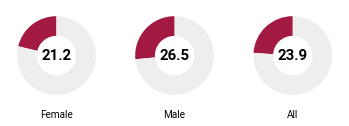

In [26]:
fig, ax = plt.subplots(ncols = 3)

for x in range(0,len(G8_7_1_data)):

    value = G8_7_1_data.iloc[x,0]
    sex = G8_7_1_data.iloc[x, 2]

    ax[x].pie( [value, 100 - value],
            wedgeprops=dict(width=.5), # donut
            startangle= 90,
            colors = [SDG_col[8],'#EEEEEE'])


    ax[x].annotate(value, (0,0),fontsize =15, fontweight = 'bold',horizontalalignment = 'center', verticalalignment = 'center')


    ax[x].axis('on')
    ax[x].set_xlabel(sex)


#### 2.9 Inudstry and Innovation
Proportion of medium and high-tech manufacturing value added in total value added (%) [NV_IND_TECH]


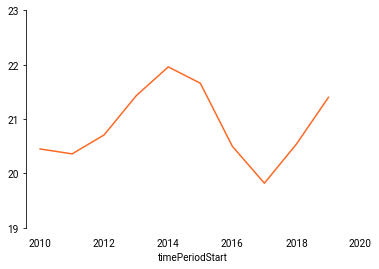

In [27]:
ax = G9_b_1_data.plot.line(color = SDG_col[9])

plt.xticks(np.arange(2010, 2021, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', which='major', length=0, pad = 10)
ax.set_ylim(19,23)
ax.set_xticks(np.arange(2010,2021,2))
ax.set_yticks(np.arange(19,24,1))

ax.get_legend().remove()

### 3. Final Visualisation

#### Page 1

<ipython-input-28-21d1d7a56f09>:190: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('regional_data_fact_sheet_SSA_p1.jpg',dpi =300,bbox_to_inches ='tight')


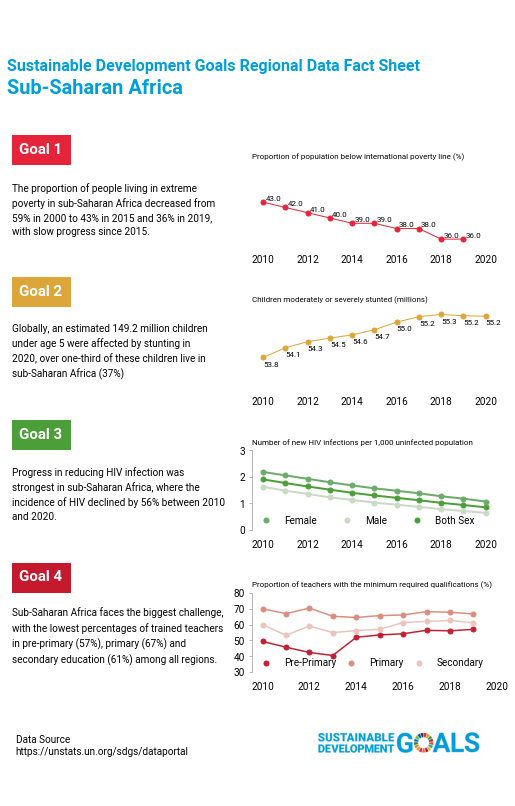

In [28]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()

# branding logo
## SDG banner
im_UNDESA = plt.imread('./E_SDG_logo_without_UN_emblem_horizontal_RGB-1200x219.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')

# footnote
dimensions = [  0.10, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate('Data Source \nhttps://unstats.un.org/sdgs/dataportal',(0.05,0.4), fontsize = 10)
newax.axis('off')
## title
dimensions = [  0.1, # left
                0.8, #bottom
                0.8, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate("Sustainable Development Goals Regional Data Fact Sheet",(0,0.6),fontweight = 'heavy',fontsize = 16, color = SDG_col[0])
newax.annotate("Sub-Saharan Africa",(0,0.45),fontweight = 'heavy', fontsize = 20, color = SDG_col[0])
newax.axis('off')



# ax_1 poverty plot
dimensions = [  0.5, # left
                0.7, #bottom
                0.4, #width
                0.10  #height
                ]
ax_1 = fig.add_axes(dimensions, zorder=1)
G1_data.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = SDG_col[1], ax =ax_1)
##### set title                        
ax_1.set_title('Proportion of population below international poverty line (%)', loc='left', fontsize = 8)
ax_1.set_xlabel("")
##### turning off spine.spines['right'].set_visible(False)
ax_1.spines['bottom'].set_visible(False)
ax_1.spines['left'].set_visible(False)
ax_1.get_yaxis().set_visible(False)
##### setting axis limit
ax_1.set_ylim(35,50)
ax_1.set_xlim(2009.5,2020.5)
#ax_1.tick_params(axis='x', which='major', length=0, pad = 10)
# data point
for key, value in G1_data.iterrows():
    ax_1.annotate(value['value'],(key+0.1,value['value']+0.3), fontsize = 8)
## word annotation
dimensions = [  0.1, # left
                0.7, #bottom
                0.4, #width
                0.12  #height
                ]
ax_1_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "The proportion of people living in extreme \npoverty in sub-Saharan Africa decreased from \n59% in 2000 to 43% in 2015 and 36% in 2019, \nwith slow progress since 2015."
ax_1_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction',fontsize = 10, linespacing = 1.5)
### goal 1 box
ax_1_annot.text(0.05, 1, "Goal 1", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[1], ec = SDG_col[1]))
ax_1_annot.set_axis_off()




# ax_2 Hunger
dimensions = [  0.5, # left
                0.52, #bottom
                0.4, #width
                0.10  #height
                ]
ax_2 = fig.add_axes(dimensions, zorder=1)
G2_data.plot.line(legend = False,  marker = '.',markersize = 10, linewidth = 1, color = SDG_col[2], ax = ax_2)
# turning off spine.spines['right'].set_visible(False)
ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)
ax_2.spines['bottom'].set_visible(False)
ax_2.spines['left'].set_visible(False)
ax_2.get_yaxis().set_visible(False)
# setting axis limit
ax_2.set_xlim(2009.5,2020.5)
ax_2.set_xlabel('')
ax_2.set_ylim(52800,55500)
ax_2.set_title('Children moderately or severely stunted (millions)',loc = 'left', fontsize = 8)
### annotation
for key, value in G2_data.iterrows():
    ax_2.annotate('{:.1f}'.format(value['<5Y']/1000),(key,value['<5Y']-300),fontsize = 8)
dimensions = [  0.1, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_2_annot = fig.add_axes(dimensions, zorder=1)
text = 'Globally, an estimated 149.2 million children \nunder age 5 were affected by stunting in \n2020, over one-third of these children live in \nsub-Saharan Africa (37%)'
ax_2_annot.annotate(text, (0.02,0.1), fontsize = 10, linespacing = 1.5)
### goal 2 box
ax_2_annot.text(0.05, 1, "Goal 2", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[2], ec = SDG_col[2]))
ax_2_annot.set_axis_off()



# ax_3 Health
dimensions = [  0.5, # left
                0.34, #bottom
                0.4, #width
                0.10  #height
                ]
ax_3 = fig.add_axes(dimensions, zorder=1)
G3_3_1_data_allage.plot.line(linewidth = 2,marker = '.',markersize = 10, color = [SDG_col[3],'#6dab6a','#c9dbc4'], ax = ax_3
                            )
ax_3.tick_params(axis='x', which='major', length=0, pad = 10, rotation = 0)
legend_elements = [Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#6dab6a', label='Female'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#c9dbc4', label='Male'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0, color=SDG_col[3], label='Both Sex')]
ax_3.legend(handles = legend_elements,loc = 'lower left', borderaxespad=0., edgecolor = '#FFFFFF',bbox_to_anchor=[0,0],ncol=3)
#ax_2.set_yticklabels(np.arange(0,3,0.5))
ax_3.set_title('Number of new HIV infections per 1,000 uninfected population',loc = 'left', fontsize = 8)
ax_3.set_xlabel("")
ax_3.set_xlim(2009.5,2020.5)
ax_3.set_xticks(np.arange(2010,2021,2))
ax_3.set_ylim(0,3)
ax_3.spines['bottom'].set_visible(False)
dimensions = [  0.1, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_3_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing HIV infection was\nstrongest in sub-Saharan Africa, where the \nincidence of HIV declined by 56% between 2010 \nand 2020.'
ax_3_annot.annotate(text, (0.02,0.1), fontsize = 10, linespacing = 1.5)
### goal 3 box
ax_3_annot.text(0.05, 1, "Goal 3", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[3], ec = SDG_col[3]))
ax_3_annot.set_axis_off()
ax_3.spines['left'].set_color('darkgrey')
ax_3.tick_params(axis='y', colors='darkgrey',labelcolor = 'black')



# ax_4 Education
dimensions = [  0.5, # left
                0.16, #bottom
                0.4, #width
                0.10  #height
                ]
ax_4 = fig.add_axes(dimensions, zorder=1)
G4_c_1_data_all.plot.line( marker = '.',markersize = 10,color = ['#c22033','#db8e7e','#ecc4bd'], ax =ax_4)
# axis labels
ax_4.set_title('Proportion of teachers with the minimum required qualifications (%)', loc = 'left', fontsize = 8)
ax_4.set_xlabel("")
# spine
ax_4.spines['bottom'].set_visible(False)
# tick marks
ax_4.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_4.yaxis.set_ticks(np.arange(30, 81, 10))
# legned
legend_elements = [Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#c22033', label='Pre-Primary'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color='#db8e7e', label='Primary'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0, color='#ecc4bd', label='Secondary')]
legend = ax_4.legend(handles = legend_elements, loc ='lower left', edgecolor = '#FFFFFF',framealpha = 0,bbox_to_anchor=[0,0],ncol=3, borderaxespad=0,columnspacing =.5)
# annotation
dimensions = [  0.1, # left
                0.16, #bottom
                0.4, #width
                0.12  #height
                ]
ax_4_annot = fig.add_axes(dimensions, zorder=1)
text = 'Sub-Saharan Africa faces the biggest challenge, \nwith the lowest percentages of trained teachers \nin pre-primary (57%), primary (67%) and \nsecondary education (61%) among all regions.'
ax_4_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal4 box
ax_4_annot.text(0.05, 1, "Goal 4", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[4], ec = SDG_col[4]))
ax_4_annot.set_axis_off()
ax_4.spines['left'].set_color('darkgrey')
ax_4.tick_params(axis='y', colors='darkgrey',labelcolor = 'black')

plt.savefig('regional_data_fact_sheet_SSA_p1.jpg',dpi =300,bbox_to_inches ='tight')


#### Page 2

<ipython-input-29-8357de77cc26>:189: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('regional_data_fact_sheet_SSA_p2.jpg',dpi =300,bbox_to_inches ='tight')


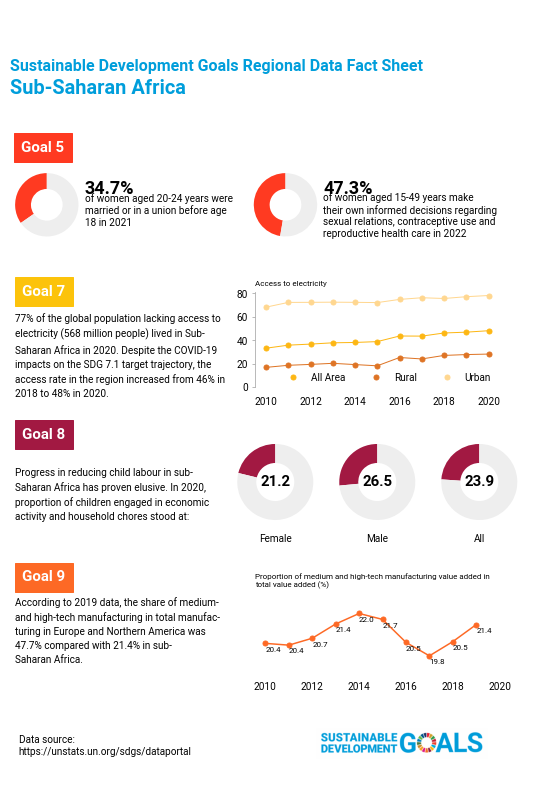

In [29]:
fig , ax = plt.subplots(figsize = (8.5,11))

ax.set_axis_off()

# branding logo
## SDG banner
im_UNDESA = plt.imread('./E_SDG_logo_without_UN_emblem_horizontal_RGB-1200x219.png')
dimensions = [  0.60, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.imshow(im_UNDESA)
newax.axis('off')

# footnote
dimensions = [  0.10, # left
                0, #bottom
                0.28, #width
                0.14  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate('Data source: \nhttps://unstats.un.org/sdgs/dataportal',(0.05,0.4), fontsize = 10)
newax.axis('off')

## title
dimensions = [  0.1, # left
                0.8, #bottom
                0.8, #width
                0.2  #height
                ]
newax = fig.add_axes(dimensions, zorder=1)
newax.annotate("Sustainable Development Goals Regional Data Fact Sheet",(0,0.6),fontweight = 'heavy',fontsize = 16, color = SDG_col[0])
newax.annotate("Sub-Saharan Africa",(0,0.45),fontweight = 'heavy', fontsize = 20, color = SDG_col[0])
newax.axis('off')


# ax_5_1 Gender
dimensions = [  -0.04, # left
                0.7, #bottom
                0.4, #width
                0.10  #height
                ]
ax_5_1 = fig.add_axes(dimensions, zorder=1)

value = G5_3_1_data.loc[2021,'value'].item()
ax_5_1.pie( [value, 100 - value], wedgeprops=dict(width=.5), startangle= 90, colors = [SDG_col[5],'#EEEEEE'])

ax_5_1.annotate('{:n}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight= 'bold')
ax_5_1.annotate('of women aged 20-24 years were \nmarried or in a union before age \n18 in 2021', (1.2,-0.65), fontsize= 10,fontname = 'roboto')
ax_5_1.axis('on')
# ax_5_2 Gender
dimensions = [  0.35, # left
                0.7, #bottom
                0.4, #width
                0.10  #height
                ]
ax_5_2 = fig.add_axes(dimensions, zorder=1)
value = G5_6_1_data['value'].item()
ax_5_2.pie( [value, 100 - value],
        wedgeprops=dict(width=.5), # donut
        startangle= 90,
        colors = [SDG_col[5],'#EEEEEE'])
ax_5_2.annotate('{:n}%'.format(value), (1.2,0.36), fontsize= 18,fontname = 'roboto', fontweight = 'bold')
ax_5_2.annotate('of women aged 15-49 years make \ntheir own informed decisions regarding \nsexual relations, contraceptive use and \nreproductive health care in 2022', (1.2,-1), fontsize= 10,fontname = 'roboto')
ax_5_2.axis('on')
### goal 5 box
ax_5_1.text(-0.8, 1.8, "Goal 5", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[5], ec = SDG_col[5]))



# ax_7 energy
dimensions = [  0.5, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_7 = fig.add_axes(dimensions, zorder=1)
G7_1_1_data.plot.line(legend = False, marker = '.',markersize = 10, linewidth = 1, color = ['#fdb714','#de7425','#ffd790'], ax =ax_7)
### ax_7 axis object
ax_7.xaxis.set_ticks(np.arange(2010, 2021, 5))
ax_7.spines['top'].set_visible(False)
ax_7.spines['right'].set_visible(False)
ax_7.spines['bottom'].set_visible(False)
ax.spines.left.set_bounds(0,80)
ax_7.xaxis.set_ticks(np.arange(2010, 2021, 2))
ax_7.yaxis.set_ticks(np.arange(0, 81, 20))
ax_7.tick_params(axis='x', which='major', length=0, pad = 10)
ax_7.set_title('Access to electricity', loc = 'left', fontsize = 8)
ax_7.set_xlabel('')
### ax_7 legend
#ax_7.legend(bbox_to_anchor=(1.2,0.5))
legend_elements = [Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color= '#fdb714', label='All Area'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0,  color= '#de7425', label='Rural'),
                    Line2D([0], [0], marker='o', markersize = 5,linewidth=0, color= '#ffd790', label='Urban')]
ax_7.legend(handles = legend_elements, loc = 'lower left',bbox_to_anchor=[0.1,0],
           ncol=3, borderaxespad=0)
### word annotation
dimensions = [  0.1, # left
                0.52, #bottom
                0.4, #width
                0.12  #height
                ]
ax_7_annot = fig.add_axes(dimensions, zorder=1,facecolor = SDG_col[1])
text = "77% of the global population lacking access to \nelectricity (568 million people) lived in Sub-\nSaharan Africa in 2020. Despite the COVID-19 \nimpacts on the SDG 7.1 target trajectory, the \naccess rate in the region increased from 46% in \n2018 to 48% in 2020. "
ax_7_annot.annotate(text,(0.02,-0.1), xycoords = 'axes fraction',fontsize = 10, linespacing = 1.5)
### goal 7 box
ax_7_annot.text(0.05, 1, "Goal 7", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[7], ec = SDG_col[7]))
ax_7_annot.set_axis_off()
ax_7.spines['left'].set_color('darkgrey')
ax_7.tick_params(axis='y', colors='darkgrey',labelcolor = 'black')



# ax_8 Decent Work 
for x in range(0,len(G8_7_1_data)):
        value = G8_7_1_data.iloc[x,0]
        sex = G8_7_1_data.iloc[x, 2]
        dimensions = [  0.45+x*(0.5/3), # left
                        0.34, #bottom
                        (0.5/3), #width
                        0.12  #height
                ]
        ax = fig.add_axes(dimensions, zorder=1)
        ax.pie( [value, 100 - value],
                wedgeprops=dict(width=.5), # donut
                startangle= 90,
                colors = [SDG_col[8],'#EEEEEE'])
        ax.annotate(value, (0,0),fontsize =15, fontweight = 'bold',horizontalalignment = 'center', verticalalignment = 'center')
        ax.axis('on')
        ax.set_xlabel(sex)
# annotation
dimensions = [  0.1, # left
                0.34, #bottom
                0.4, #width
                0.12  #height
                ]
ax_8_annot = fig.add_axes(dimensions, zorder=1)
text = 'Progress in reducing child labour in sub-\nSaharan Africa has proven elusive. In 2020, \nproportion of children engaged in economic \nactivity and household chores stood at:'
                                                                        
ax_8_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal8 box
ax_8_annot.text(0.05, 1, "Goal 8", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[8], ec = SDG_col[8]))
ax_8_annot.set_axis_off()





# ax_9 Industry and innovation
dimensions = [  0.5, # left
                0.16, #bottom
                0.4, #width
                0.10  #height
                ]
ax_9 = fig.add_axes(dimensions, zorder=1)
G9_b_1_data.plot.line(color = SDG_col[9],marker = '.',markersize = 10,  ax = ax_9)
#plt.xticks(np.arange(2010, 2021, 5))
ax_9.spines['top'].set_visible(False)
ax_9.spines['right'].set_visible(False)
ax_9.spines['bottom'].set_visible(False)
ax_9.spines['left'].set_visible(False)
ax_9.get_yaxis().set_visible(False)
ax_9.tick_params(axis='x', which='major', length=0, pad = 10)
ax_9.set_ylim(19,23)
ax_9.set_xticks(np.arange(2010,2021,2))
ax_9.set_xlabel('')
ax_9.get_legend().remove()
ax_9.set_title('Proportion of medium and high-tech manufacturing value added in \ntotal value added (%)', loc = 'left',fontsize = 8)
for key, value in G9_b_1_data.iterrows():
    ax_9.annotate('{:.1f}'.format(value['ISIC4_C']),(key,value['ISIC4_C']-0.4),fontsize = 8)
# annotation
dimensions = [  0.1, # left
                0.16, #bottom
                0.4, #width
                0.12  #height
                ]
ax_9_annot = fig.add_axes(dimensions, zorder=1)
text = 'According to 2019 data, the share of medium- \nand high-tech manufacturing in total manufac-\nturing in Europe and Northern America was \n47.7% compared with 21.4% in sub-\nSaharan Africa.'
ax_9_annot.annotate(text,(0.02,0.1), xycoords = 'axes fraction', fontsize = 10, linespacing = 1.5)
### goal9 box
ax_9_annot.text(0.05, 1, "Goal 9", ha="left", va="center", size=15, fontweight = 'heavy', color = '#FFFFFF',
                bbox=dict(boxstyle="square,pad=0.5", fc=SDG_col[9], ec = SDG_col[9]))
ax_9_annot.set_axis_off()
plt.savefig('regional_data_fact_sheet_SSA_p2.jpg',dpi =300,bbox_to_inches ='tight')